# CSE 4/587 B
# Project Phase - 2
# Team members:
# Yash Dattu Sonkamble (yashdatt)
# Sameer Yadav (syadav6)
# Anirudh Anilkumar (aanilkum)

## Problem Statement: The problem at hand is the significant variation in house prices across different neighborhoods in Perth (relevant to other places as well provided the data is available), driven by factors like proximity to amenities, property attributes, and land area.

## Link of the dataset - https://www.kaggle.com/datasets/syuzai/perth-house-prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv("cleaned_dataset.csv")

In [3]:
dataset

Unnamed: 0     PRICE  BEDROOMS  BATHROOMS    GARAGE  LAND_AREA  \
0               2  0.211609  0.333333   0.000000  0.142857   0.020125   
1               3  0.100155  0.333333   0.000000  0.000000   0.012776   
2               4  0.139703  0.500000   0.333333  0.142857   0.010072   
3               6  0.283515  0.500000   0.333333  0.142857   0.012535   
4               7  0.678997  0.500000   0.333333  0.142857   0.008290   
...           ...       ...       ...        ...       ...        ...   
27012       34649  0.268106  0.333333   0.333333  0.142857   0.038847   
27013       34651  0.149975  0.333333   0.333333  0.000000   0.004786   
27014       34652  0.268106  0.333333   0.000000  0.000000   0.014097   
27015       34653  0.322036  0.500000   0.333333  0.000000   0.013216   
27016       34654  0.392657  0.333333   0.333333  0.142857   0.005867   

       FLOOR_AREA  BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  POSTCODE  \
0        0.342666        1976  0.350389          0.110214      6025   
1        0.173719        1970  0.646458          0.030485      6168   
2        0.391664        2006  0.245894          0.183921      6065   
3        0.405345        2001  0.393929          0.065893      6027   
4        0.325167        1958  0.134433          0.076010      6153   
...           ...         ...       ...               ...       ...   
27012    0.394209        1995  0.465334          0.450327      6072   
27013    0.258352        2010  0.486233          0.204155      6031   
27014    0.325167        1981  0.110051          0.062521      6102   
27015    0.443207        1971  0.216287          0.023572      6024   
27016    0.505568        2002  0.158815          0.102988      6019   

        LATITUDE   LONGITUDE  NEAREST_SCH_DIST  SOLD_YEAR  \
0     -31.789940  115.749430          0.098992       2016   
1     -32.282580  115.765910          0.101262       2009   
2     -31.820450  115.841220          0.084779       2015   
3     -31.754180  115.778820          0.103726       2019   
4     -32.026430  115.842360          0.064093       2016   
...          ...         ...               ...        ...   
27012 -31.900350  116.142070          0.329427       2011   
27013 -31.700286  115.801334          0.038371       2017   
27014 -32.001890  115.904800          0.096495       2018   
27015 -31.844430  115.804220          0.108535       2015   
27016 -31.902381  115.773237          0.049039       2019   

       PRICE_CATEGORY_HIGH  PRICE_CATEGORY_LOW  PRICE_CATEGORY_MEDIUM  
0                        0                   0                      1  
1                        0                   1                      0  
2                        0                   1                      0  
3                        0                   0                      1  
4                        1                   0                      0  
...                    ...                 ...                    ...  
27012                    0                   0                      1  
27013                    0                   1                      0  
27014                    0                   0                      1  
27015                    0                   0                      1  
27016                    1                   0                      0  

[27017 rows x 18 columns]

In [4]:
Columns_To_Drop = ['Unnamed: 0', 'BUILD_YEAR', 'POSTCODE', 'SOLD_YEAR']
dataset = dataset.drop(columns = Columns_To_Drop, axis = 1)

In [5]:
dataset

PRICE  BEDROOMS  BATHROOMS    GARAGE  LAND_AREA  FLOOR_AREA  \
0      0.211609  0.333333   0.000000  0.142857   0.020125    0.342666   
1      0.100155  0.333333   0.000000  0.000000   0.012776    0.173719   
2      0.139703  0.500000   0.333333  0.142857   0.010072    0.391664   
3      0.283515  0.500000   0.333333  0.142857   0.012535    0.405345   
4      0.678997  0.500000   0.333333  0.142857   0.008290    0.325167   
...         ...       ...        ...       ...        ...         ...   
27012  0.268106  0.333333   0.333333  0.142857   0.038847    0.394209   
27013  0.149975  0.333333   0.333333  0.000000   0.004786    0.258352   
27014  0.268106  0.333333   0.000000  0.000000   0.014097    0.325167   
27015  0.322036  0.500000   0.333333  0.000000   0.013216    0.443207   
27016  0.392657  0.333333   0.333333  0.142857   0.005867    0.505568   

       CBD_DIST  NEAREST_STN_DIST   LATITUDE   LONGITUDE  NEAREST_SCH_DIST  \
0      0.350389          0.110214 -31.789940  115.749430          0.098992   
1      0.646458          0.030485 -32.282580  115.765910          0.101262   
2      0.245894          0.183921 -31.820450  115.841220          0.084779   
3      0.393929          0.065893 -31.754180  115.778820          0.103726   
4      0.134433          0.076010 -32.026430  115.842360          0.064093   
...         ...               ...        ...         ...               ...   
27012  0.465334          0.450327 -31.900350  116.142070          0.329427   
27013  0.486233          0.204155 -31.700286  115.801334          0.038371   
27014  0.110051          0.062521 -32.001890  115.904800          0.096495   
27015  0.216287          0.023572 -31.844430  115.804220          0.108535   
27016  0.158815          0.102988 -31.902381  115.773237          0.049039   

       PRICE_CATEGORY_HIGH  PRICE_CATEGORY_LOW  PRICE_CATEGORY_MEDIUM  
0                        0                   0                      1  
1                        0                   1                      0  
2                        0                   1                      0  
3                        0                   0                      1  
4                        1                   0                      0  
...                    ...                 ...                    ...  
27012                    0                   0                      1  
27013                    0                   1                      0  
27014                    0                   0                      1  
27015                    0                   0                      1  
27016                    1                   0                      0  

[27017 rows x 14 columns]

In [7]:
# list of columns which are not required for our features as they correspond to output
columns_to_drop = ["PRICE_CATEGORY_HIGH", "PRICE_CATEGORY_MEDIUM", "PRICE_CATEGORY_LOW", "PRICE"]

# 1. LINEAR REGRESSION

In [143]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE"]

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [145]:
Linear_Regression_Model = LinearRegression()
Linear_Regression_Model.fit(X_train, Y_train)

LinearRegression()

In [146]:
Y_Pred_Linear_Regression = Linear_Regression_Model.predict(X_test)

In [147]:
Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Linear_Regression)
Root_Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Linear_Regression, squared=False)
Mean_Absolute_Error = mean_absolute_error(Y_test, Y_Pred_Linear_Regression)
R2_Score = r2_score(Y_test, Y_Pred_Linear_Regression)

print("Mean Squared Error : ",Mean_Squared_Error)
print("Root Mean Squared Error : ",Root_Mean_Squared_Error)
print("Mean Absolute Error : ",Mean_Absolute_Error)
print("R2 Score : ",R2_Score)

Mean Squared Error :  0.012493622493567698
Root Mean Squared Error :  0.11177487416037514
Mean Absolute Error :  0.0801695821047885
R2 Score :  0.5194424372703426


In [148]:
data = {'Y_test': Y_test, 'Y_Pred_Linear_Regression': Y_Pred_Linear_Regression}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Y_Pred_Linear_Regression')

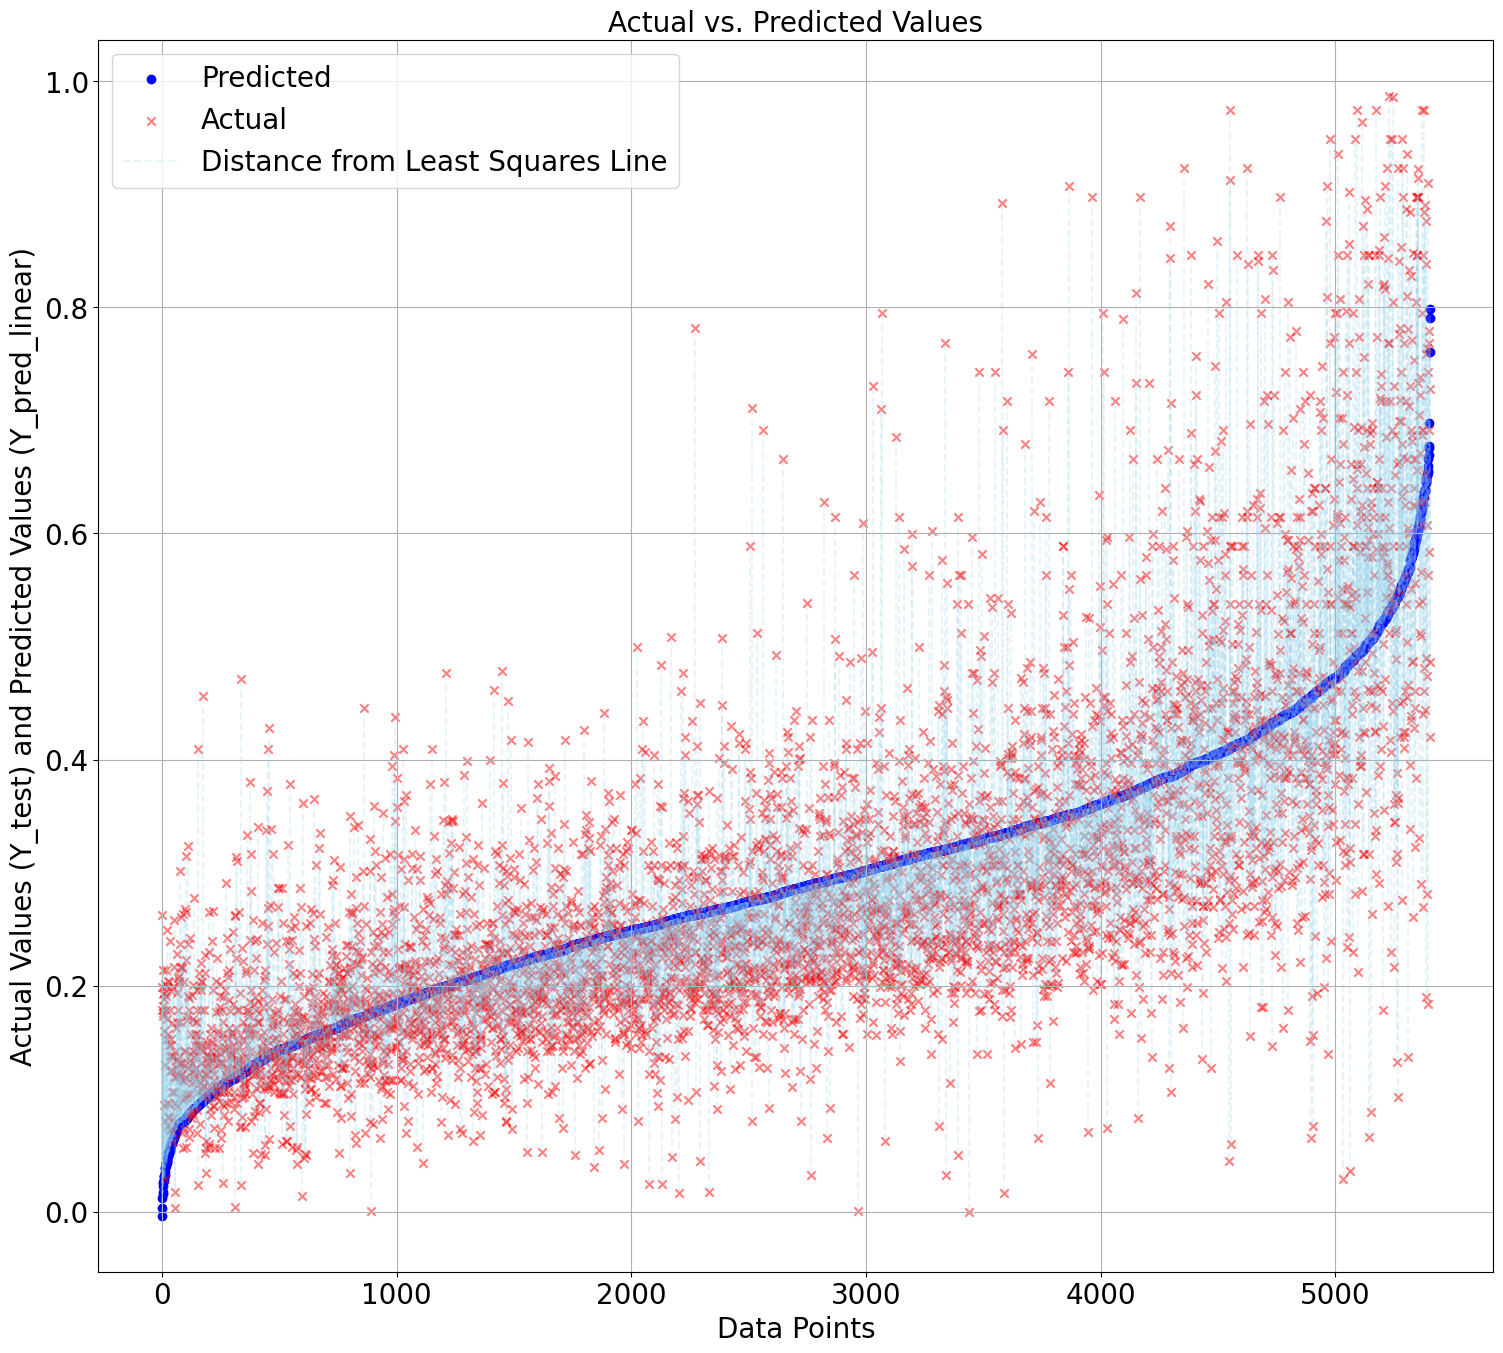

In [149]:
plt.figure(figsize=(18,16))

plt.scatter(range(len(df_sorted)), df_sorted['Y_Pred_Linear_Regression'], color='blue', label='Predicted', marker='o')
plt.scatter(range(len(df_sorted)), df_sorted['Y_test'], color='red', label='Actual', marker='x', alpha=0.5)
plt.vlines(range(0,df_sorted.shape[0]), ymin=df_sorted['Y_test'], ymax=df_sorted['Y_Pred_Linear_Regression'], ls='--', colors="skyblue", label='Distance from Least Squares Line', alpha=0.2)

plt.xlabel('Data Points', fontsize=20)
plt.ylabel('Actual Values (Y_test) and Predicted Values (Y_pred_linear)', fontsize=20)
plt.title('Actual vs. Predicted Values', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.grid(True)

plt.show()

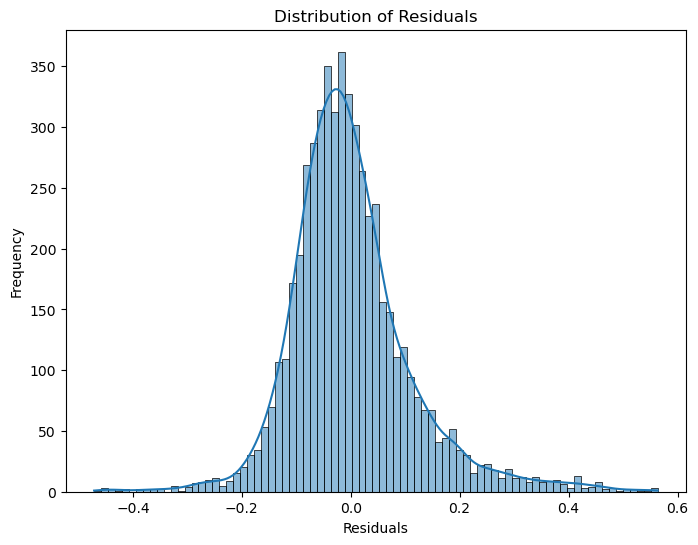

In [150]:
Residuals = Y_test - Y_Pred_Linear_Regression

plt.figure(figsize=(8, 6))

sns.histplot(Residuals, kde=True)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

# 2. LOGISTIC REGRESSION

### 2.1 PRICE_CATEGORY_LOW

In [151]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_LOW"]

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [153]:
Logistic_Regression_Model = LogisticRegression(C = 10, max_iter = 10000)
Logistic_Regression_Model.fit(X_train, Y_train)

LogisticRegression(C=10, max_iter=10000)

In [154]:
Y_Pred_Logistic_Regression = Logistic_Regression_Model.predict(X_test)

In [155]:
Accuracy = accuracy_score(Y_test, Y_Pred_Logistic_Regression)
Precision = precision_score(Y_test, Y_Pred_Logistic_Regression)
Recall = recall_score(Y_test, Y_Pred_Logistic_Regression)
F1_Score = f1_score(Y_test, Y_Pred_Logistic_Regression)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Logistic_Regression)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Logistic_Regression)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 82.36%
Precision :  0.6934523809523809
Recall :  0.5204765450483991
F1 Score :  0.5946405784772437
ROC AUC Score :  0.7221934559765513


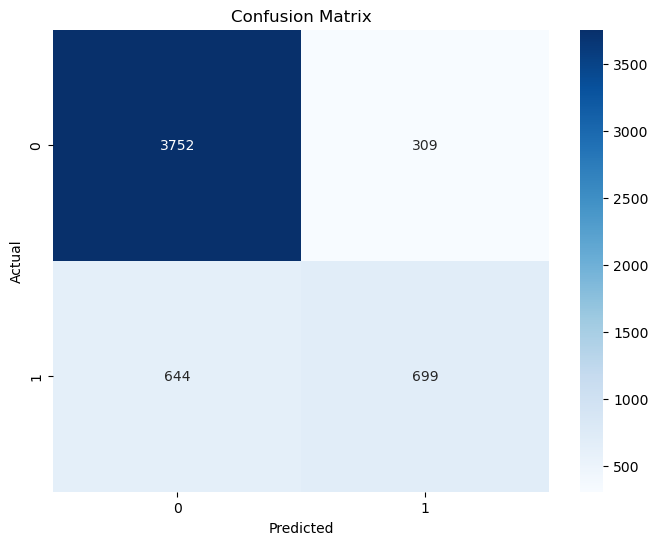

In [156]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

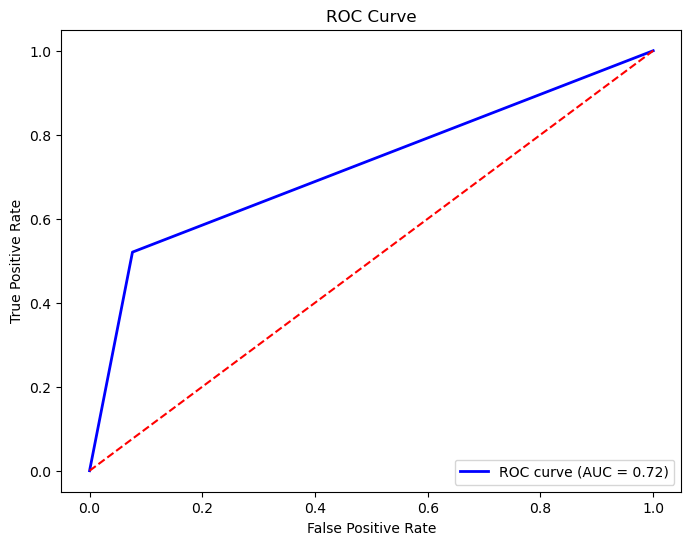

In [157]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Logistic_Regression)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 2.2 PRICE_CATEGORY_MEDIUM

In [158]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_MEDIUM"]

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [160]:
Logistic_Regression_Model = LogisticRegression(C = 10, max_iter = 10000)
Logistic_Regression_Model.fit(X_train, Y_train)

LogisticRegression(C=10, max_iter=10000)

In [161]:
Y_Pred_Logistic_Regression = Logistic_Regression_Model.predict(X_test)

In [162]:
Accuracy = accuracy_score(Y_test, Y_Pred_Logistic_Regression)
Precision = precision_score(Y_test, Y_Pred_Logistic_Regression)
Recall = recall_score(Y_test, Y_Pred_Logistic_Regression)
F1_Score = f1_score(Y_test, Y_Pred_Logistic_Regression)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Logistic_Regression)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Logistic_Regression)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 59.72%
Precision :  0.5919755185311119
Recall :  0.6405445180279618
F1 Score :  0.6153030570772221
ROC AUC Score :  0.5968917675768997


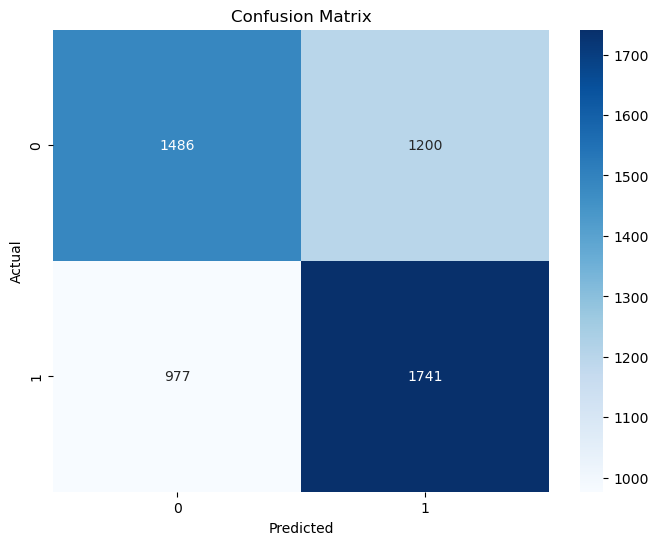

In [163]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

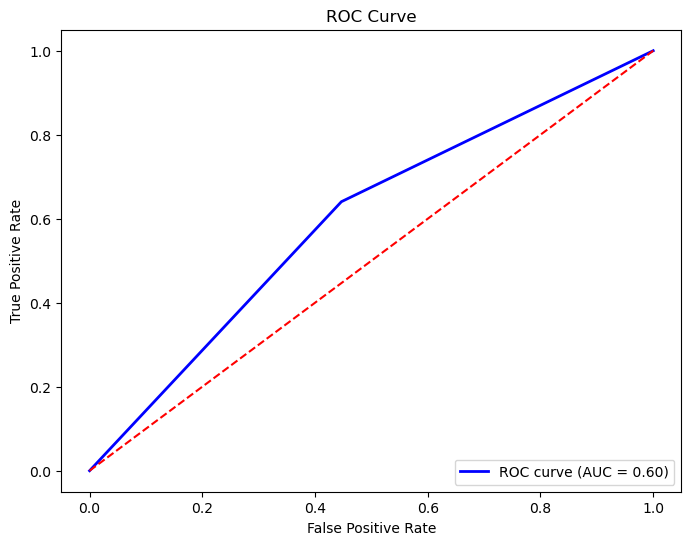

In [164]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Logistic_Regression)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 2.3 PRICE_CATEGORY_HIGH

In [165]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_HIGH"]

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [167]:
Logistic_Regression_Model = LogisticRegression(C = 10, max_iter = 10000)
Logistic_Regression_Model.fit(X_train, Y_train)

LogisticRegression(C=10, max_iter=10000)

In [168]:
Y_Pred_Logistic_Regression = Logistic_Regression_Model.predict(X_test)

In [169]:
Accuracy = accuracy_score(Y_test, Y_Pred_Logistic_Regression)
Precision = precision_score(Y_test, Y_Pred_Logistic_Regression)
Recall = recall_score(Y_test, Y_Pred_Logistic_Regression)
F1_Score = f1_score(Y_test, Y_Pred_Logistic_Regression)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Logistic_Regression)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Logistic_Regression)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 84.22%
Precision :  0.7628755364806867
Recall :  0.5294117647058824
F1 Score :  0.6250549450549451
ROC AUC Score :  0.7374958355664353


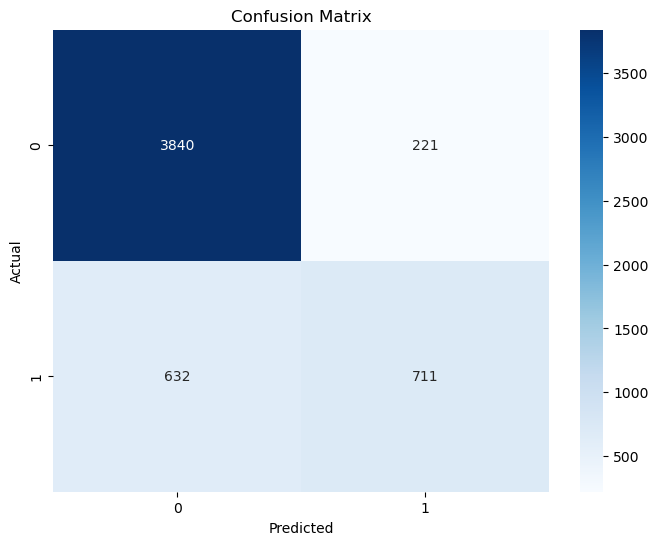

In [170]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

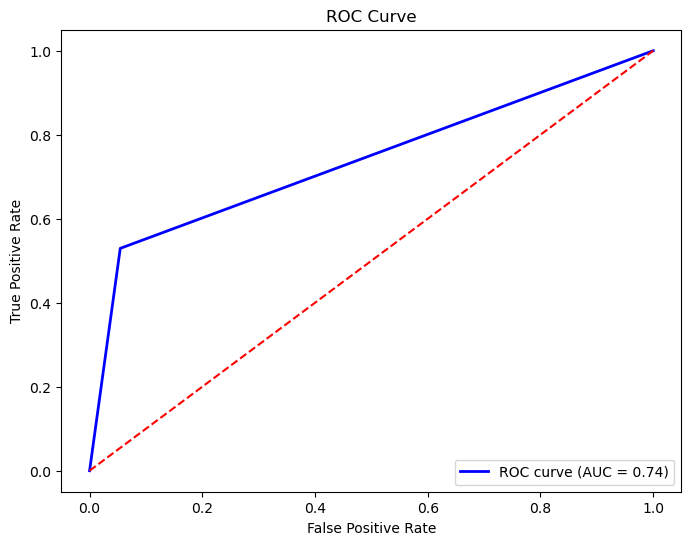

In [171]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Logistic_Regression)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()


# 3. DECISION TREE

### 3.1 PRICE_CATEGORY_LOW

In [172]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_LOW"]

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [174]:
Model = DecisionTreeClassifier(max_depth=10)
Decision_Tree_Model = Model.fit(X_train, Y_train)

In [175]:
Y_Pred_Decision_Tree = Decision_Tree_Model.predict(X_test)

In [176]:
Accuracy = accuracy_score(Y_test, Y_Pred_Decision_Tree)
Precision = precision_score(Y_test, Y_Pred_Decision_Tree)
Recall = recall_score(Y_test, Y_Pred_Decision_Tree)
F1_Score = f1_score(Y_test, Y_Pred_Decision_Tree)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Decision_Tree)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Decision_Tree)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 86.27%
Precision :  0.7409783480352847
Recall :  0.68801191362621
F1 Score :  0.7135135135135136
ROC AUC Score :  0.8042374268943657


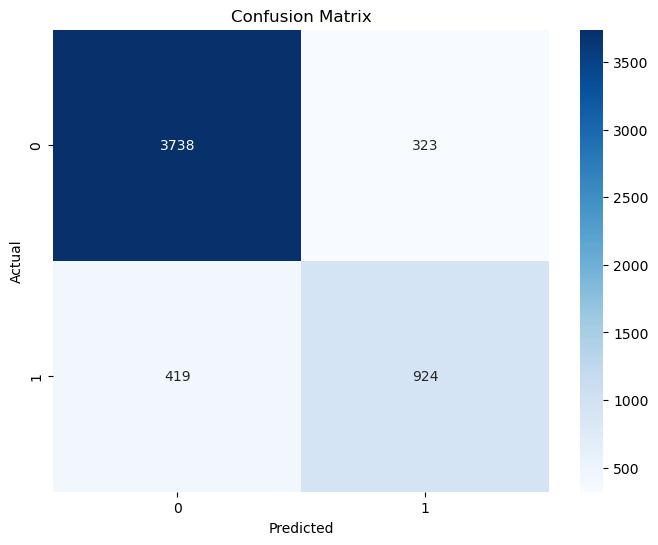

In [177]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

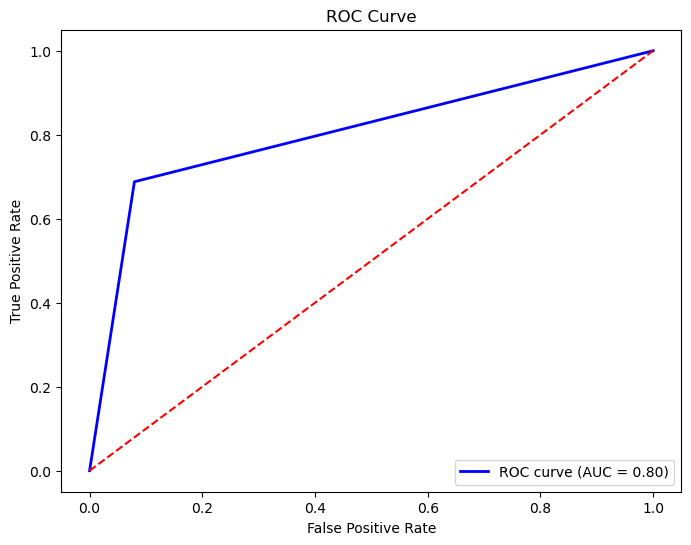

In [178]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Decision_Tree)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 3.2 PRICE_CATEGORY_MEDIUM

In [179]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_MEDIUM"]

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [181]:
Model = DecisionTreeClassifier(max_depth=10)
Decision_Tree_Model = Model.fit(X_train, Y_train)

In [182]:
Y_Pred_Decision_Tree = Decision_Tree_Model.predict(X_test)

In [183]:
Accuracy = accuracy_score(Y_test, Y_Pred_Decision_Tree)
Precision = precision_score(Y_test, Y_Pred_Decision_Tree)
Recall = recall_score(Y_test, Y_Pred_Decision_Tree)
F1_Score = f1_score(Y_test, Y_Pred_Decision_Tree)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Decision_Tree)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Decision_Tree)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 75.65%
Precision :  0.7492887624466572
Recall :  0.7752023546725534
F1 Score :  0.7620253164556963
ROC AUC Score :  0.7563651386169914


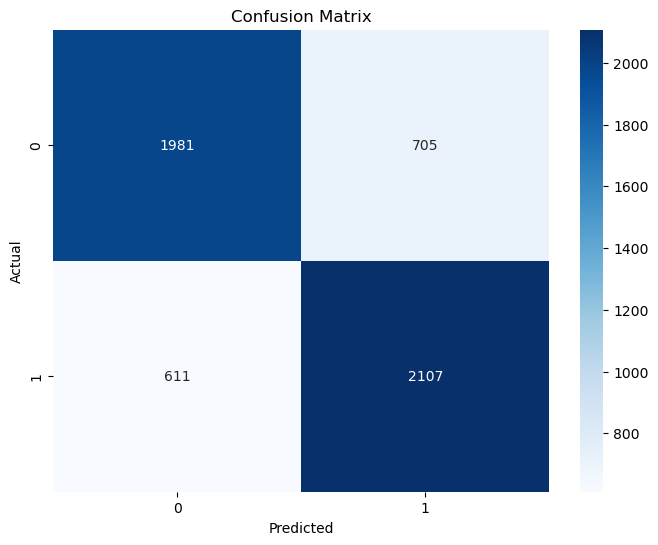

In [184]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

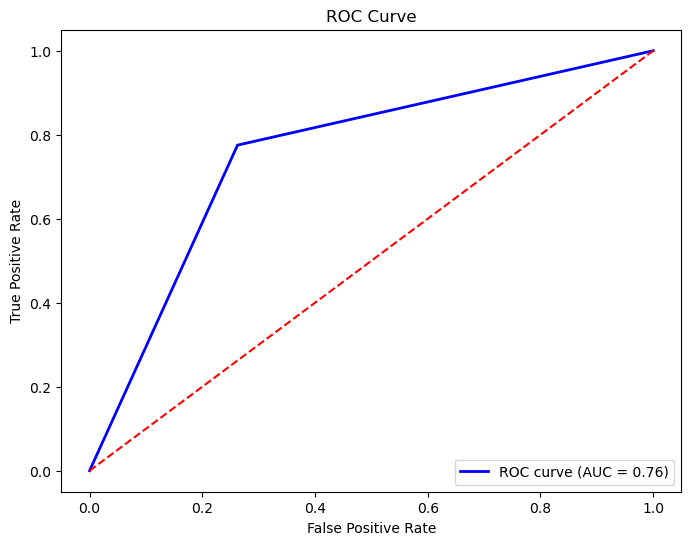

In [185]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Decision_Tree)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 3.3 PRICE_CATEGORY_HIGH

In [186]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_HIGH"]

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [188]:
Model = DecisionTreeClassifier(max_depth=10)
Decision_Tree_Model = Model.fit(X_train, Y_train)

In [189]:
Y_Pred_Decision_Tree = Decision_Tree_Model.predict(X_test)

In [190]:
Accuracy = accuracy_score(Y_test, Y_Pred_Decision_Tree)
Precision = precision_score(Y_test, Y_Pred_Decision_Tree)
Recall = recall_score(Y_test, Y_Pred_Decision_Tree)
F1_Score = f1_score(Y_test, Y_Pred_Decision_Tree)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Decision_Tree)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Decision_Tree)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 87.69%
Precision :  0.7707667731629393
Recall :  0.7185405807892777
F1 Score :  0.74373795761079
ROC AUC Score :  0.8239341662872762


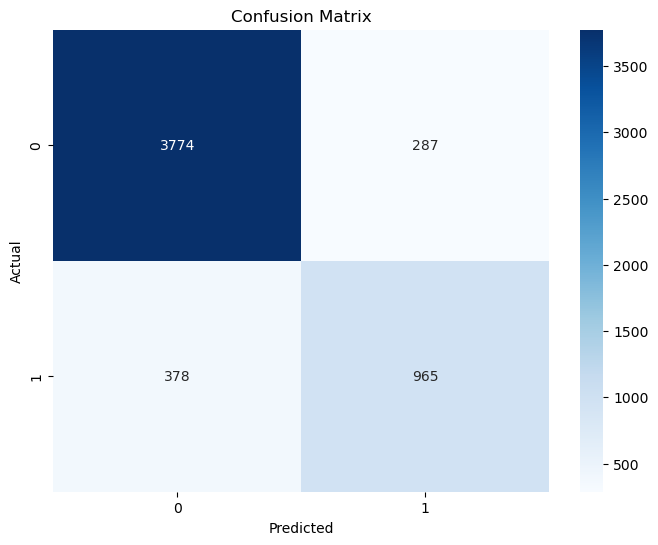

In [191]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

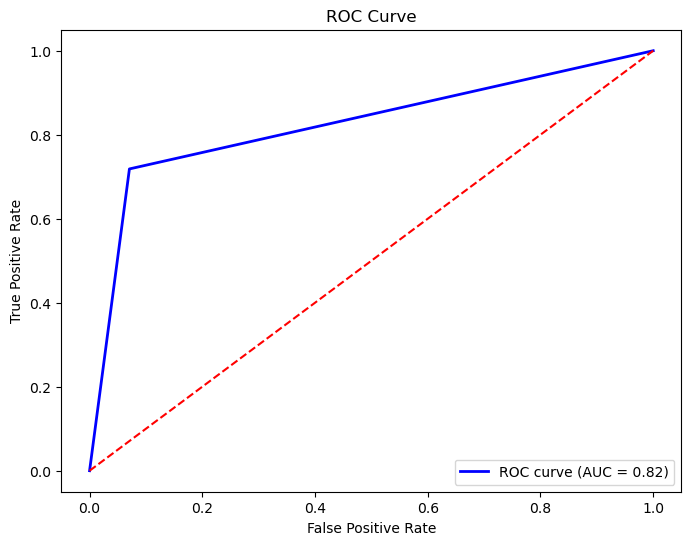

In [192]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Decision_Tree)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

# 3.4 Decision Tree Regression

In [193]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE"]

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [195]:
DTregressor = DecisionTreeRegressor(max_depth=10)

In [196]:
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10)

In [197]:
Y_Pred_Decision_Tree = DTregressor.predict(X_test)

In [198]:
Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree)
Root_Mean_Squared_Error = mean_squared_error(Y_test, Y_Pred_Decision_Tree, squared=False)
Mean_Absolute_Error = mean_absolute_error(Y_test, Y_Pred_Decision_Tree)
R2_Score = r2_score(Y_test, Y_Pred_Decision_Tree)

print("Mean Squared Error : ",Mean_Squared_Error)
print("Root Mean Squared Error : ",Root_Mean_Squared_Error)
print("Mean Absolute Error : ",Mean_Absolute_Error)
print("R2 Score : ",R2_Score)

Mean Squared Error :  0.009899518499987851
Root Mean Squared Error :  0.0994963240526395
Mean Absolute Error :  0.06405386783311508
R2 Score :  0.6192226485952661


In [199]:
data = {'Y_test': Y_test, 'Y_Pred_Decision_Tree': Y_Pred_Decision_Tree}

df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Y_Pred_Decision_Tree')

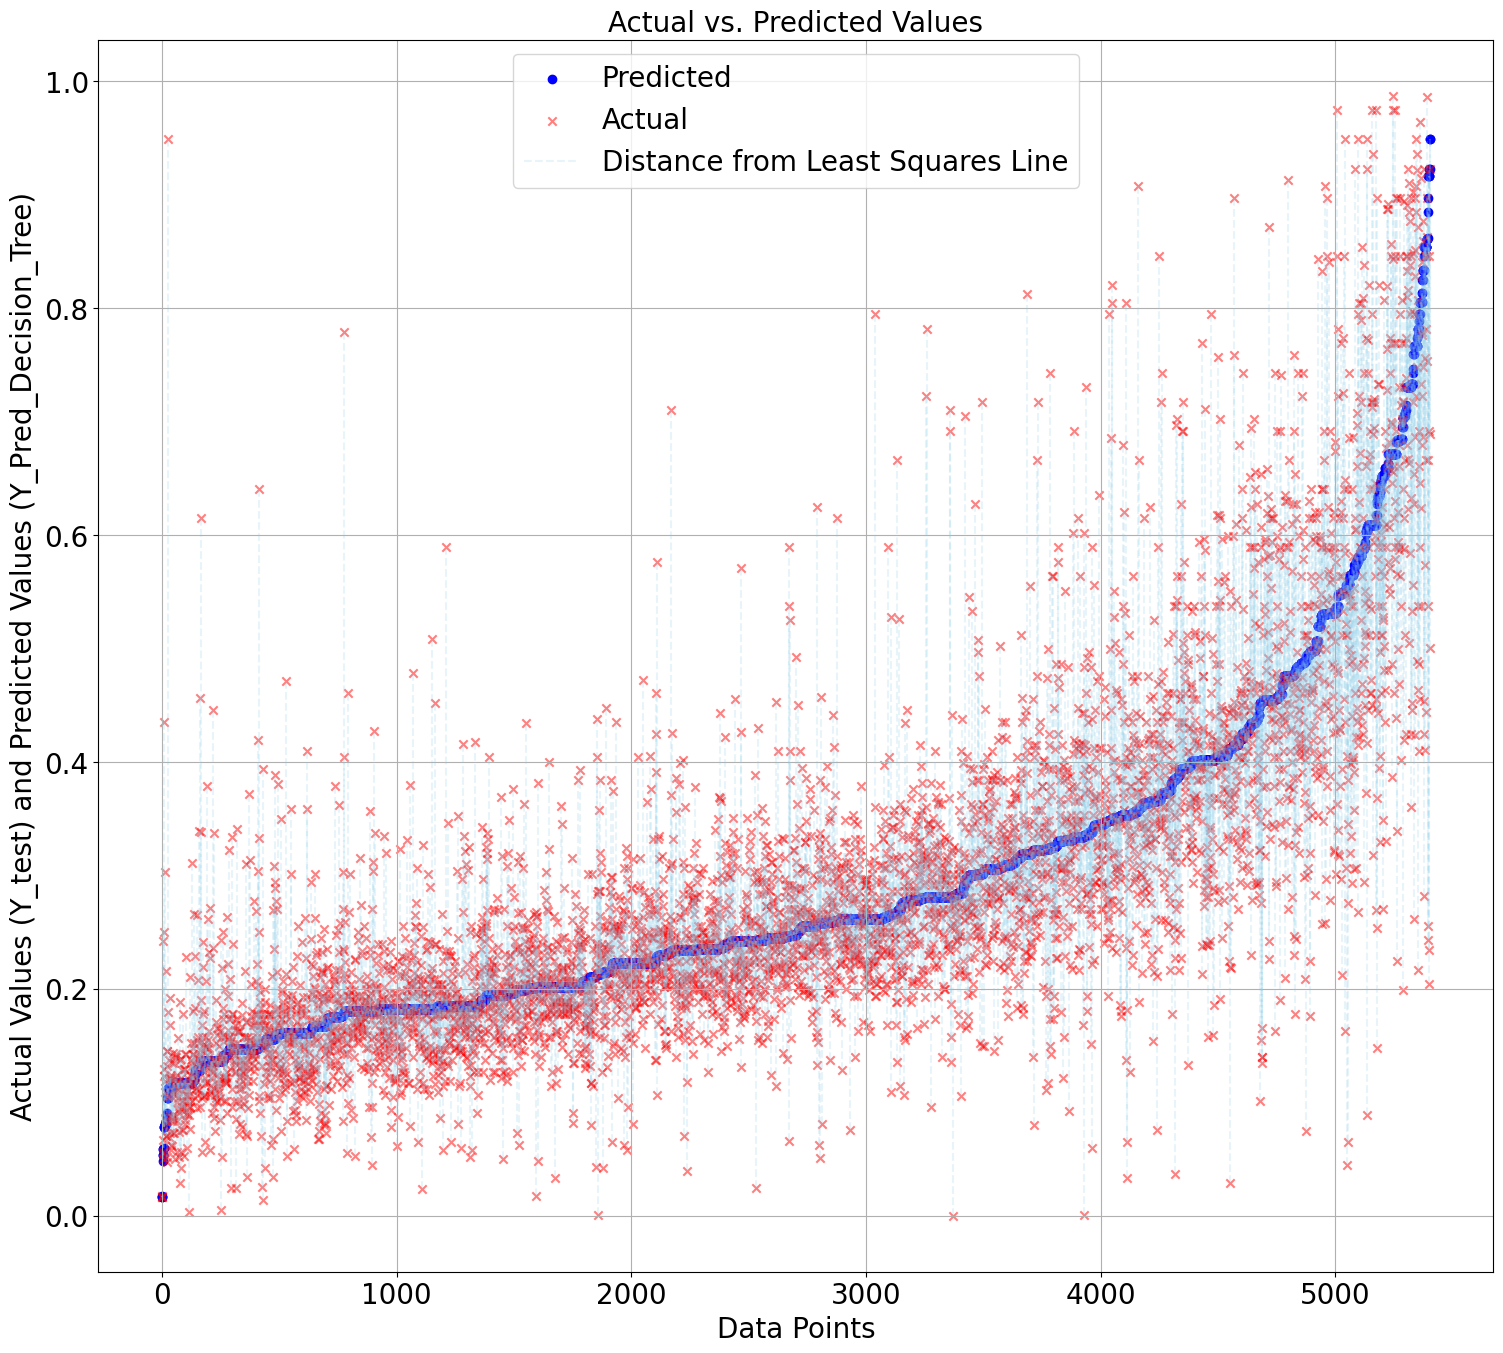

In [200]:
plt.figure(figsize=(18,16))

plt.scatter(range(len(df_sorted)), df_sorted['Y_Pred_Decision_Tree'], color='blue', label='Predicted', marker='o')
plt.scatter(range(len(df_sorted)), df_sorted['Y_test'], color='red', label='Actual', marker='x', alpha=0.5)
plt.vlines(range(0,df_sorted.shape[0]), ymin=df_sorted['Y_test'], ymax=df_sorted['Y_Pred_Decision_Tree'], ls='--', colors="skyblue", label='Distance from Least Squares Line', alpha=0.2)

plt.xlabel('Data Points', fontsize=20)
plt.ylabel('Actual Values (Y_test) and Predicted Values (Y_Pred_Decision_Tree)', fontsize=20)
plt.title('Actual vs. Predicted Values', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='best', fontsize=20)

plt.grid(True)

plt.show()

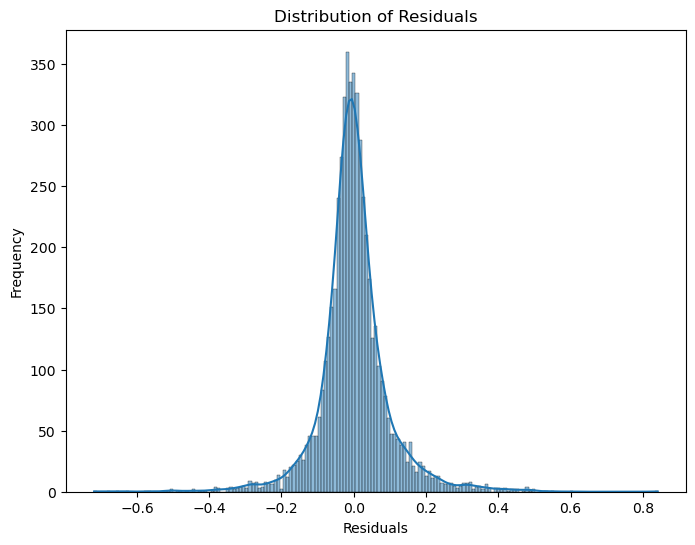

In [201]:
Residuals = Y_test - Y_Pred_Decision_Tree

plt.figure(figsize=(8, 6))

sns.histplot(Residuals, kde=True)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()

# 4. Support Vector Machine

### 4.1 PRICE_CATEGORY_LOW

In [202]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_LOW"]

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=80)

In [204]:
SVM_Model = SVC(kernel='linear', C=1.0)
SVM_Model.fit(X_train, Y_train)

SVC(kernel='linear')

In [205]:
Y_Pred_SVM = SVM_Model.predict(X_test)

In [206]:
Accuracy = accuracy_score(Y_test, Y_Pred_SVM)
Precision = precision_score(Y_test, Y_Pred_SVM)
Recall = recall_score(Y_test, Y_Pred_SVM)
F1_Score = f1_score(Y_test, Y_Pred_SVM)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_SVM)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_SVM)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 83.66%
Precision :  0.7277227722772277
Recall :  0.5472822040208488
F1 Score :  0.6247343816404589
ROC AUC Score :  0.7397824465068539


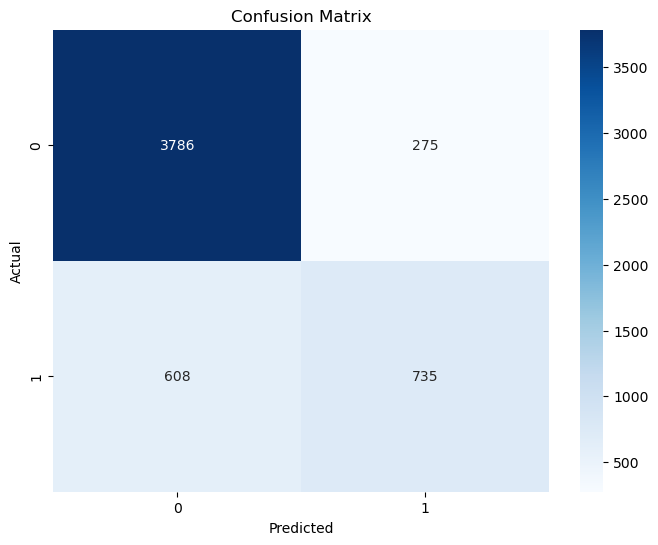

In [207]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

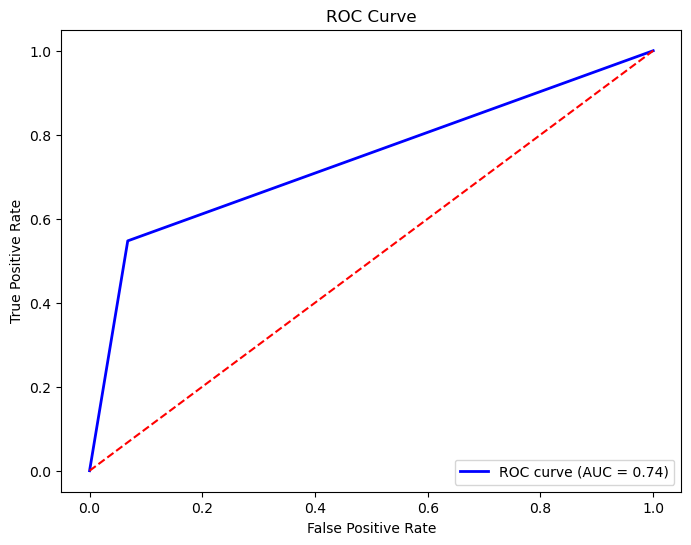

In [208]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_SVM)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()


### 4.2 PRICE_CATEGORY_MEDIUM

In [209]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_MEDIUM"]

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [211]:
SVM_Model = SVC(kernel='linear', C=1.0)
SVM_Model.fit(X_train, Y_train)

SVC(kernel='linear')

In [212]:
Y_Pred_SVM = SVM_Model.predict(X_test)

In [213]:
Accuracy = accuracy_score(Y_test, Y_Pred_SVM)
Precision = precision_score(Y_test, Y_Pred_SVM)
Recall = recall_score(Y_test, Y_Pred_SVM)
F1_Score = f1_score(Y_test, Y_Pred_SVM)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_SVM)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_SVM)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 59.79%
Precision :  0.5915966386554622
Recall :  0.6475349521707138
F1 Score :  0.6183031793430529
ROC AUC Score :  0.5975947285053121


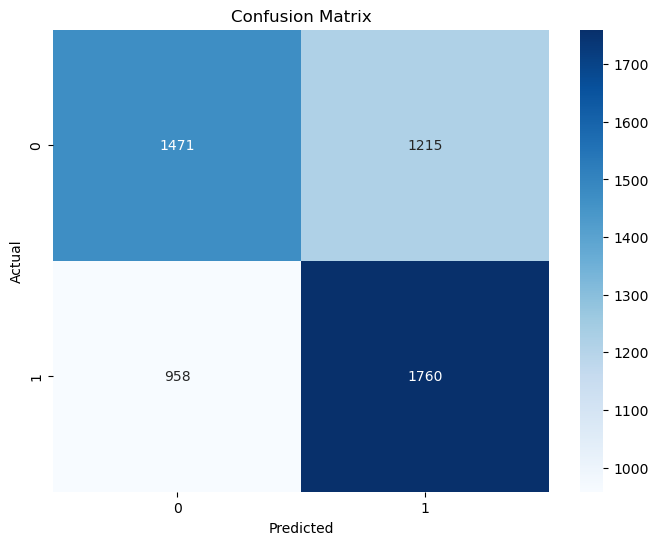

In [214]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

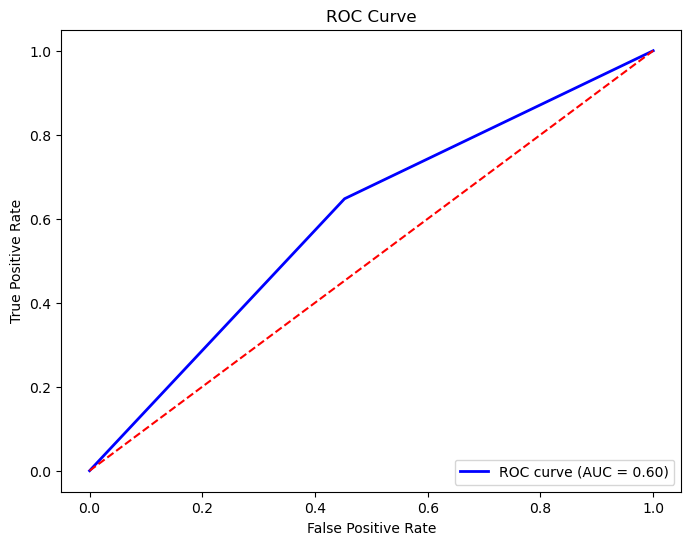

In [215]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_SVM)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 4.3 PRICE_CATEGORY_HIGH

In [216]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_HIGH"]

In [217]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [218]:
SVM_Model = SVC(kernel='linear', C=1.0)
SVM_Model.fit(X_train, Y_train)

SVC(kernel='linear')

In [219]:
Y_Pred_SVM = SVM_Model.predict(X_test)

In [220]:
Accuracy = accuracy_score(Y_test, Y_Pred_SVM)
Precision = precision_score(Y_test, Y_Pred_SVM)
Recall = recall_score(Y_test, Y_Pred_SVM)
F1_Score = f1_score(Y_test, Y_Pred_SVM)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_SVM)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_SVM)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 85.84%
Precision :  0.7816764132553606
Recall :  0.5971705137751303
F1 Score :  0.6770789362600254
ROC AUC Score :  0.7710058429501113


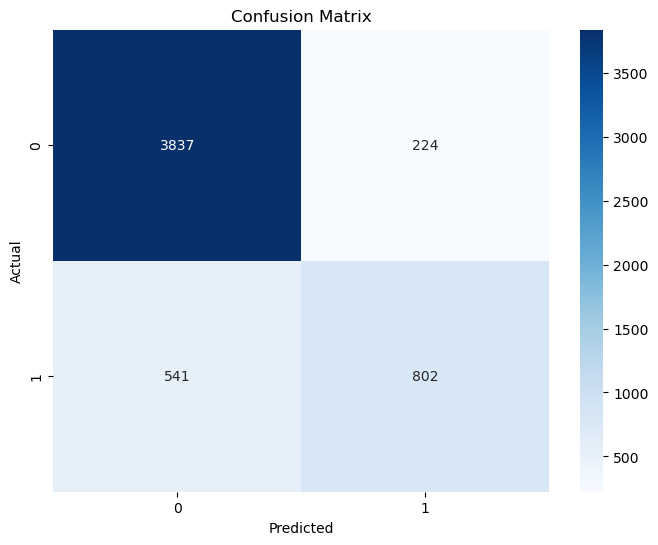

In [221]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

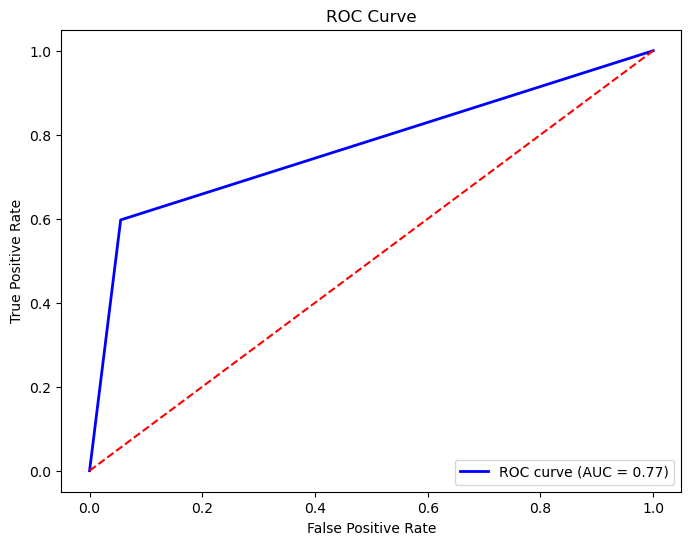

In [222]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_SVM)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()


# 5. Naive Bayes

### 5.1 PRICE_CATEGORY_LOW

In [223]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_LOW"]

In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [225]:
Model_Naive_Bayes = GaussianNB()
Model_Naive_Bayes.fit(X_train, Y_train)

GaussianNB()

In [226]:
Y_Pred_NB = Model_Naive_Bayes.predict(X_test)

In [227]:
Accuracy = accuracy_score(Y_test, Y_Pred_NB)
Precision = precision_score(Y_test, Y_Pred_NB)
Recall = recall_score(Y_test, Y_Pred_NB)
F1_Score = f1_score(Y_test, Y_Pred_NB)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_NB)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_NB)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 78.02%
Precision :  0.5457227138643068
Recall :  0.6887565152643336
F1 Score :  0.608953258722844
ROC AUC Score :  0.7495740222221692


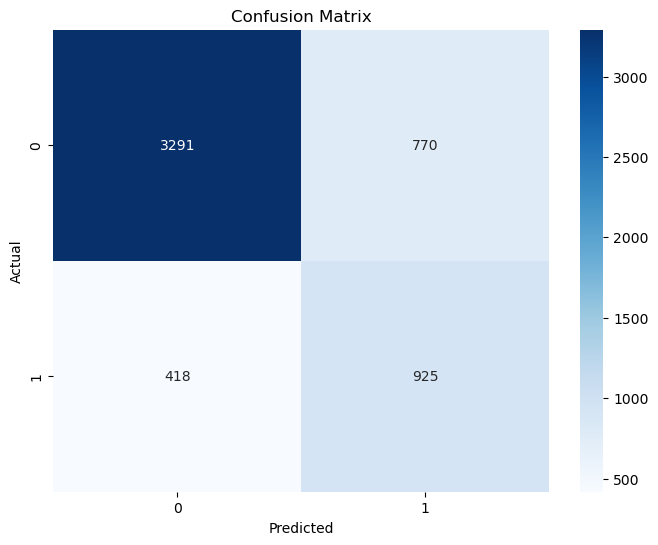

In [228]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

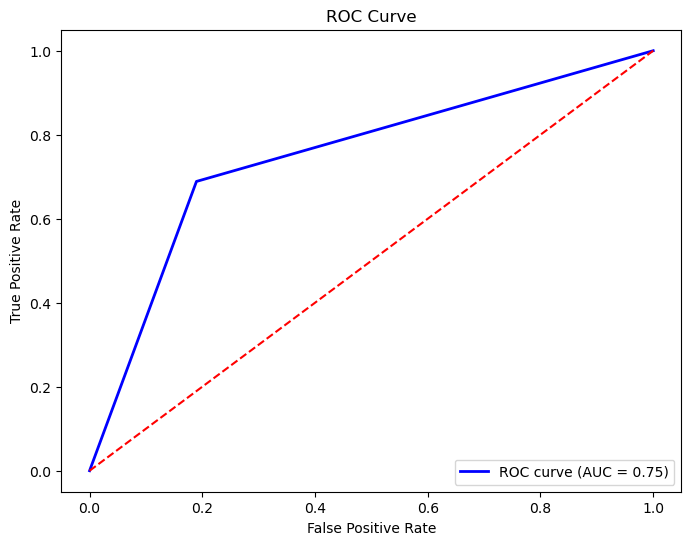

In [229]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_NB)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 5.2 PRICE_CATEGORY_MEDIUM

In [230]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_MEDIUM"]

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [232]:
Model_Naive_Bayes = GaussianNB()
Model_Naive_Bayes.fit(X_train, Y_train)

GaussianNB()

In [233]:
Y_Pred_NB = Model_Naive_Bayes.predict(X_test)

In [234]:
Accuracy = accuracy_score(Y_test, Y_Pred_NB)
Precision = precision_score(Y_test, Y_Pred_NB)
Recall = recall_score(Y_test, Y_Pred_NB)
F1_Score = f1_score(Y_test, Y_Pred_NB)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_NB)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_NB)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 61.36%
Precision :  0.5853658536585366
Recall :  0.7947019867549668
F1 Score :  0.6741573033707865
ROC AUC Score :  0.6125408667952049


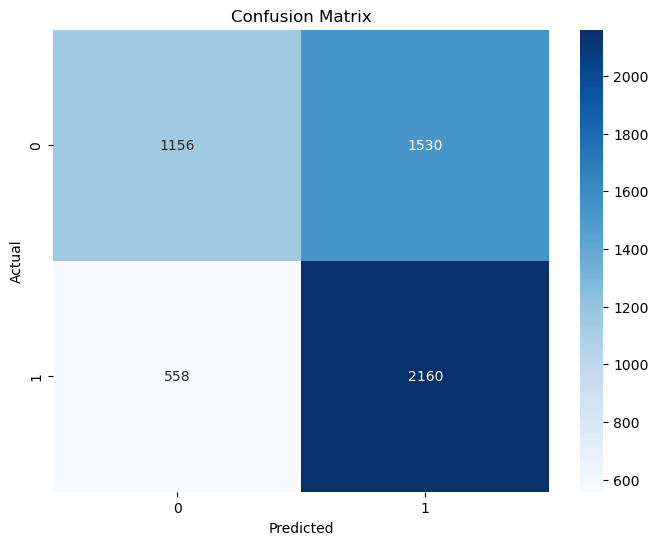

In [235]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

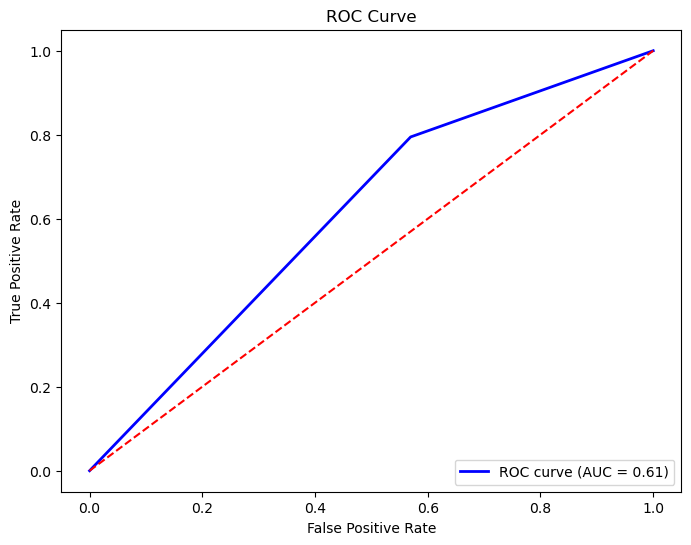

In [236]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_NB)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 5.3 PRICE_CATEGORY_HIGH

In [237]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_HIGH"]

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [239]:
Model_Naive_Bayes = GaussianNB()
Model_Naive_Bayes.fit(X_train, Y_train)

GaussianNB()

In [240]:
Y_Pred_NB = Model_Naive_Bayes.predict(X_test)

In [241]:
Accuracy = accuracy_score(Y_test, Y_Pred_NB)
Precision = precision_score(Y_test, Y_Pred_NB)
Recall = recall_score(Y_test, Y_Pred_NB)
F1_Score = f1_score(Y_test, Y_Pred_NB)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_NB)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_NB)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 82.05%
Precision :  0.6881937436932392
Recall :  0.5078183172002978
F1 Score :  0.5844044558697515
ROC AUC Score :  0.7158643420525006


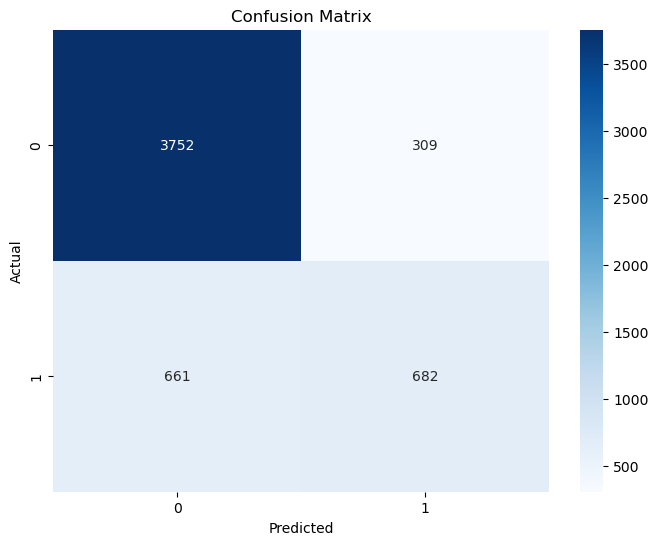

In [242]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

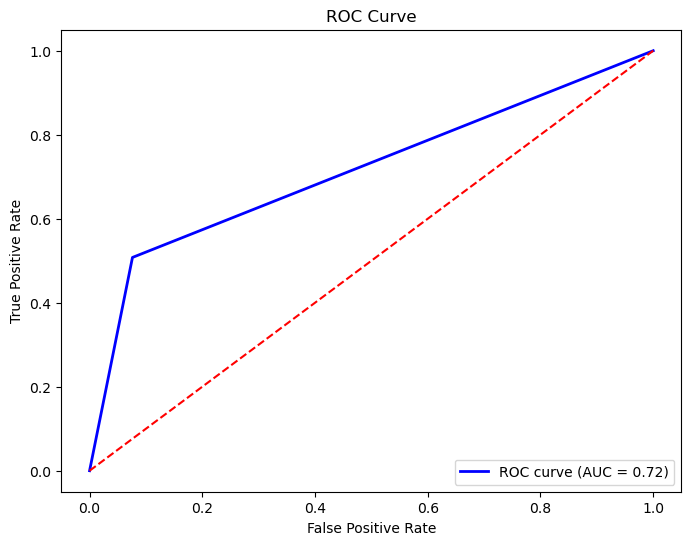

In [243]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_NB)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

# 6. Random Forest 

### 6.1 PRICE_CATEGORY_LOW

In [126]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_LOW"]

In [127]:
n_estimators = 100
max_depth = None
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [128]:
Random_Forest_Model = RandomForestClassifier(n_estimators=n_estimators, random_state=80, max_depth=max_depth)
Random_Forest_Model.fit(X_train, Y_train)

RandomForestClassifier(random_state=80)

In [129]:
Y_Pred_RFC = Random_Forest_Model.predict(X_test)

In [130]:
Accuracy = accuracy_score(Y_test, Y_Pred_RFC)
Precision = precision_score(Y_test, Y_Pred_RFC)
Recall = recall_score(Y_test, Y_Pred_RFC)
F1_Score = f1_score(Y_test, Y_Pred_RFC)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_RFC)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_RFC)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 88.45%
Precision :  0.7998331943286072
Recall :  0.7140729709605361
F1 Score :  0.7545239968528719
ROC AUC Score :  0.8274871134044247


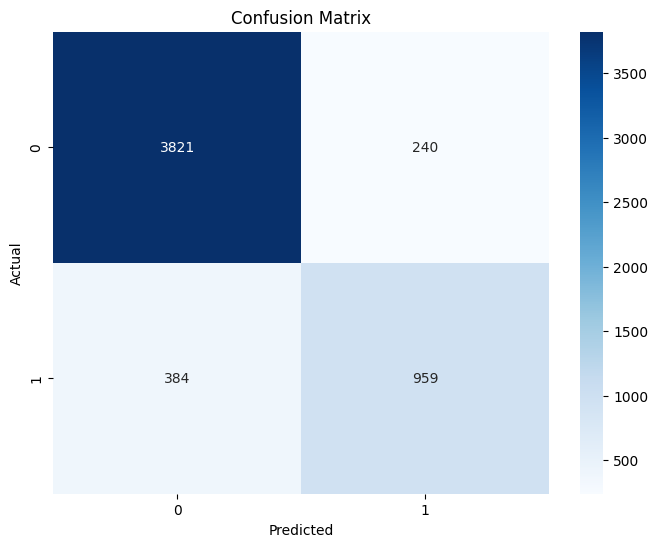

In [131]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

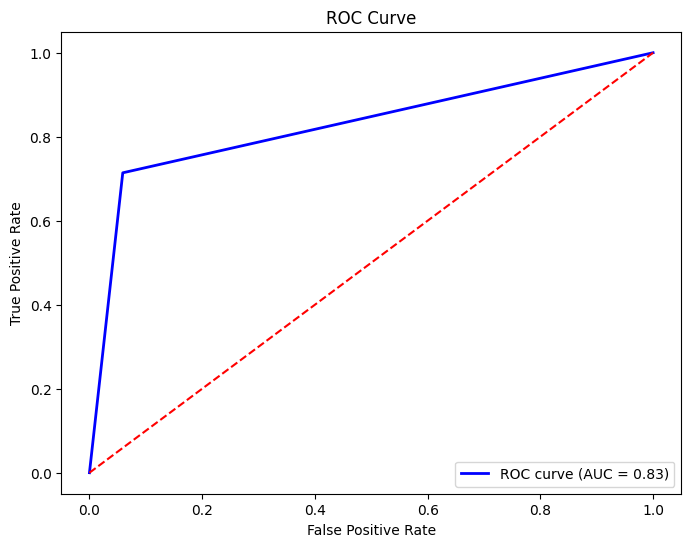

In [132]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_RFC)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 6.2 PRICE_CATEGORY_MEDIUM

In [133]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_MEDIUM"]

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [135]:
Random_Forest_Model = RandomForestClassifier(n_estimators=n_estimators, random_state=80, max_depth=max_depth)
Random_Forest_Model.fit(X_train, Y_train)

RandomForestClassifier(random_state=80)

In [136]:
Y_Pred_RFC = Random_Forest_Model.predict(X_test)

In [137]:
Accuracy = accuracy_score(Y_test, Y_Pred_RFC)
Precision = precision_score(Y_test, Y_Pred_RFC)
Recall = recall_score(Y_test, Y_Pred_RFC)
F1_Score = f1_score(Y_test, Y_Pred_RFC)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_RFC)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_RFC)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 79.94%
Precision :  0.7955861070911722
Recall :  0.8090507726269316
F1 Score :  0.8022619481940897
ROC AUC Score :  0.7993504049285067


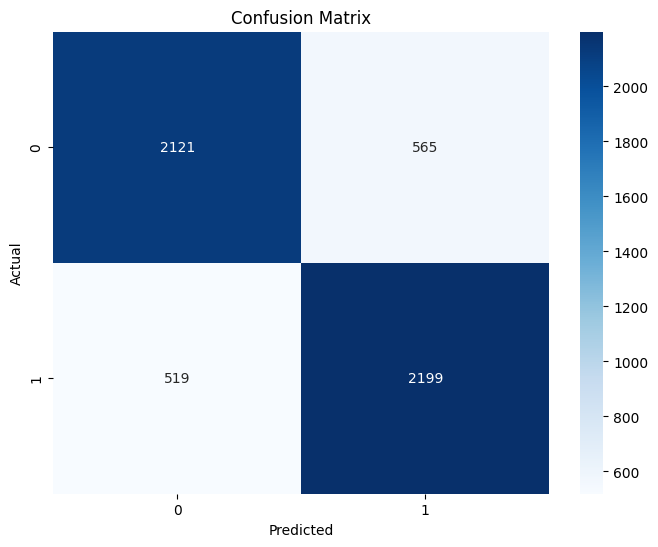

In [138]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

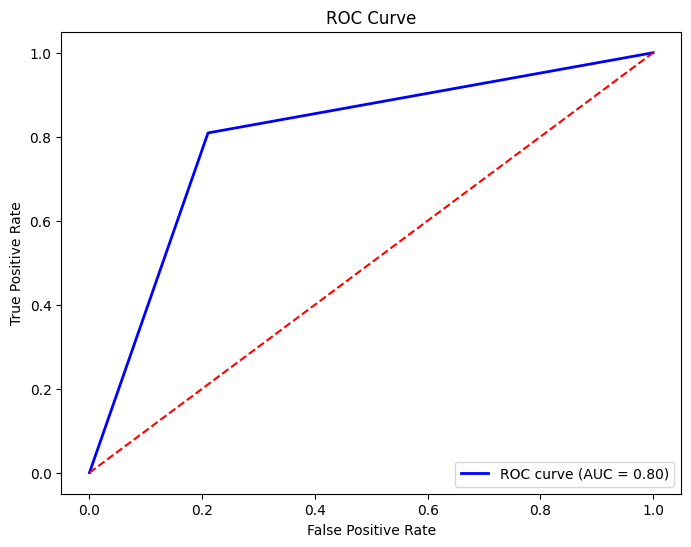

In [139]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_RFC)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 6.3 PRICE_CATEGORY_HIGH

In [140]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_HIGH"]

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [142]:
Random_Forest_Model = RandomForestClassifier(n_estimators=n_estimators, random_state=80, max_depth=max_depth)
Random_Forest_Model.fit(X_train, Y_train)

RandomForestClassifier(random_state=80)

In [143]:
Y_Pred_RFC = Random_Forest_Model.predict(X_test)

In [144]:
Accuracy = accuracy_score(Y_test, Y_Pred_RFC)
Precision = precision_score(Y_test, Y_Pred_RFC)
Recall = recall_score(Y_test, Y_Pred_RFC)
F1_Score = f1_score(Y_test, Y_Pred_RFC)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_RFC)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_RFC)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)


Accuracy: 90.12%
Precision :  0.8259468170829976
Recall :  0.763216679076694
F1 Score :  0.7933436532507738
ROC AUC Score :  0.8550139046700879


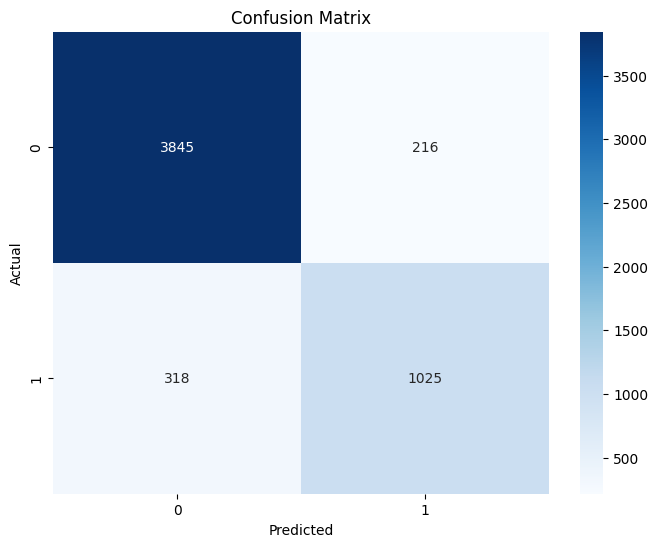

In [145]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

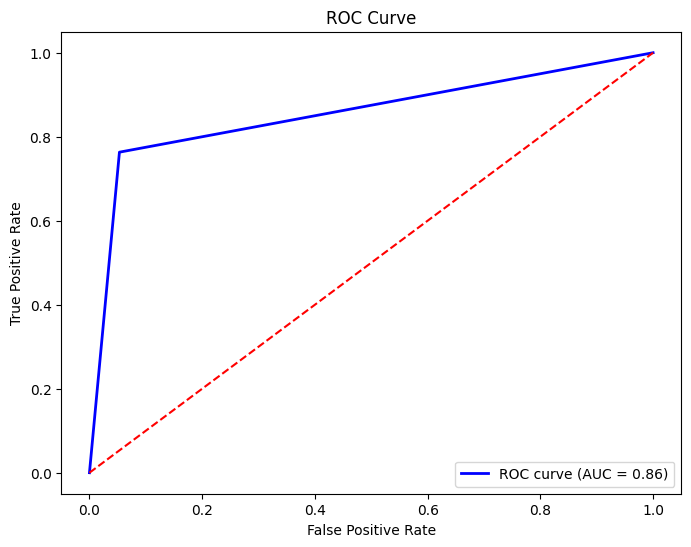

In [146]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_RFC)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()


# 7. VOTING CLASSIFIER

### 7.1 PRICE_CATEGORY_LOW

In [265]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_LOW"]

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [267]:
VC_Logistic_Regression_Model = LogisticRegression(C = 10, max_iter = 10000)
VC_DTC_Model = DecisionTreeClassifier()
VC_SVM_Model = SVC(kernel='linear')
VC_Random_Forest_Classifier = RandomForestClassifier(n_estimators=100, random_state=80)
VC_Model_Naive_Bayes = GaussianNB()

In [268]:
VC_Ensemble = VotingClassifier(estimators=[('LogReg', VC_Logistic_Regression_Model), 
                                           ('DecisionTree', VC_DTC_Model), 
                                           ('SVM',VC_SVM_Model), 
                                           ('RFC', VC_Random_Forest_Classifier),
                                           ('NaiveBayes', VC_Model_Naive_Bayes)
                                          ], voting='hard');


VC_Ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(C=10, max_iter=10000)),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('SVM', SVC(kernel='linear')),
                             ('RFC', RandomForestClassifier(random_state=80)),
                             ('NaiveBayes', GaussianNB())])

In [269]:
Y_Pred_Ensemble = VC_Ensemble.predict(X_test)

In [270]:
Accuracy = accuracy_score(Y_test, Y_Pred_Ensemble)
Precision = precision_score(Y_test, Y_Pred_Ensemble)
Recall = recall_score(Y_test, Y_Pred_Ensemble)
F1_Score = f1_score(Y_test, Y_Pred_Ensemble)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Ensemble)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Ensemble)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 85.75%
Precision :  0.7502183406113537
Recall :  0.6396128071481757
F1 Score :  0.6905144694533761
ROC AUC Score :  0.7845934018503745


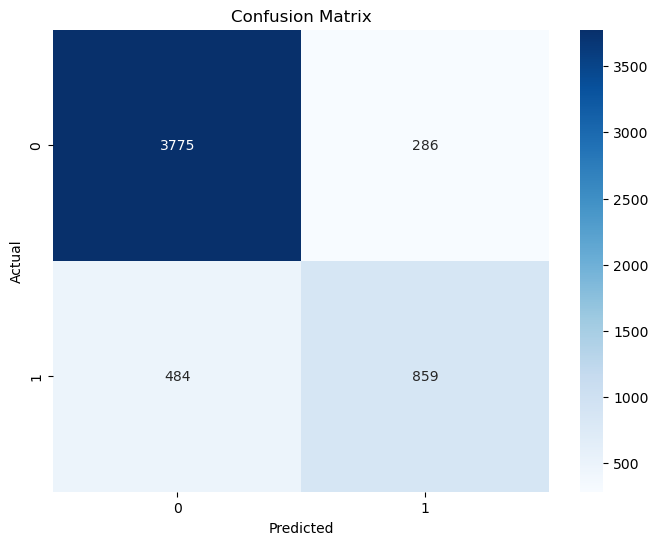

In [271]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

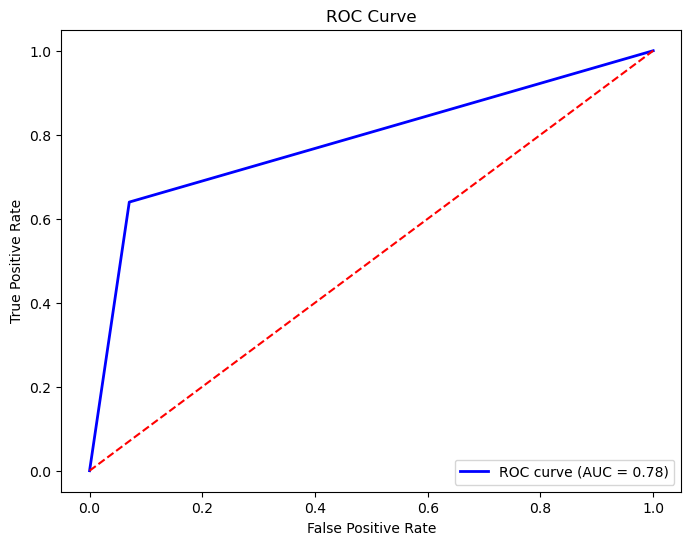

In [272]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Ensemble)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 7.2 PRICE_CATEGORY_MEDIUM

In [273]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_MEDIUM"]

In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [275]:
VC_Ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(C=10, max_iter=10000)),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('SVM', SVC(kernel='linear')),
                             ('RFC', RandomForestClassifier(random_state=80)),
                             ('NaiveBayes', GaussianNB())])

In [276]:
Y_Pred_Ensemble = VC_Ensemble.predict(X_test)

In [277]:
Accuracy = accuracy_score(Y_test, Y_Pred_Ensemble)
Precision = precision_score(Y_test, Y_Pred_Ensemble)
Recall = recall_score(Y_test, Y_Pred_Ensemble)
F1_Score = f1_score(Y_test, Y_Pred_Ensemble)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Ensemble)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Ensemble)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 69.97%
Precision :  0.6735340729001584
Recall :  0.7818248712288447
F1 Score :  0.7236506044610932
ROC AUC Score :  0.6991775137975944


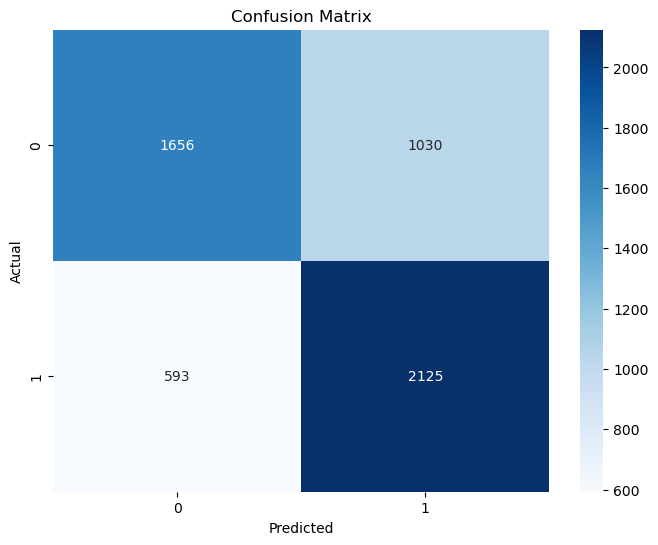

In [278]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

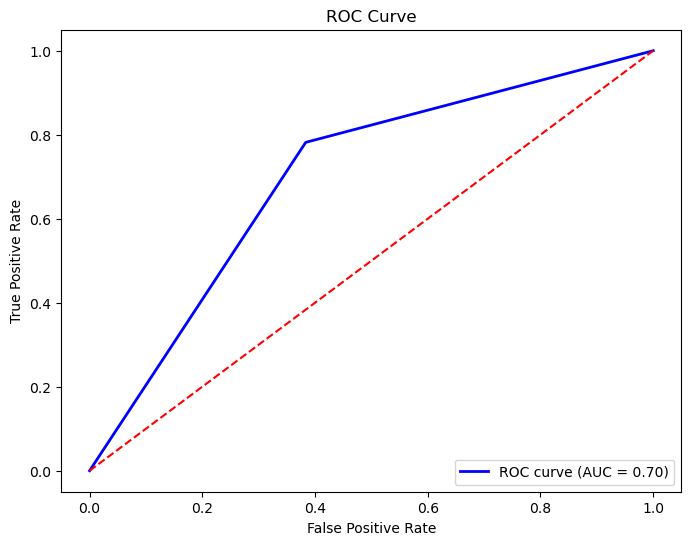

In [279]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Ensemble)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()

### 7.3 PRICE_CATEGORY_HIGH

In [280]:
X = dataset.drop(columns=columns_to_drop, axis = 1)
Y = dataset["PRICE_CATEGORY_HIGH"]

In [281]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 80)

In [282]:
VC_Ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(C=10, max_iter=10000)),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('SVM', SVC(kernel='linear')),
                             ('RFC', RandomForestClassifier(random_state=80)),
                             ('NaiveBayes', GaussianNB())])

In [283]:
Y_Pred_Ensemble = VC_Ensemble.predict(X_test)

In [284]:
Accuracy = accuracy_score(Y_test, Y_Pred_Ensemble)
Precision = precision_score(Y_test, Y_Pred_Ensemble)
Recall = recall_score(Y_test, Y_Pred_Ensemble)
F1_Score = f1_score(Y_test, Y_Pred_Ensemble)
Roc_Auc_Score = roc_auc_score(Y_test, Y_Pred_Ensemble)
Confusion_Matrix = confusion_matrix(Y_test, Y_Pred_Ensemble)

print("Accuracy: {:.2f}%".format(Accuracy*100))
print("Precision : ",Precision)
print("Recall : ",Recall)
print("F1 Score : ",F1_Score)
print("ROC AUC Score : ",Roc_Auc_Score)

Accuracy: 86.71%
Precision :  0.8019323671497585
Recall :  0.6180193596425912
F1 Score :  0.6980656013456686
ROC AUC Score :  0.7837695911731793


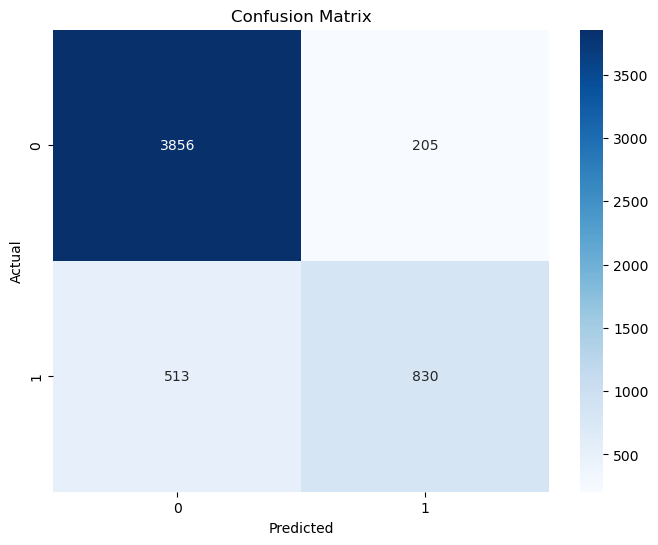

In [285]:
plt.figure(figsize=(8, 6))

sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

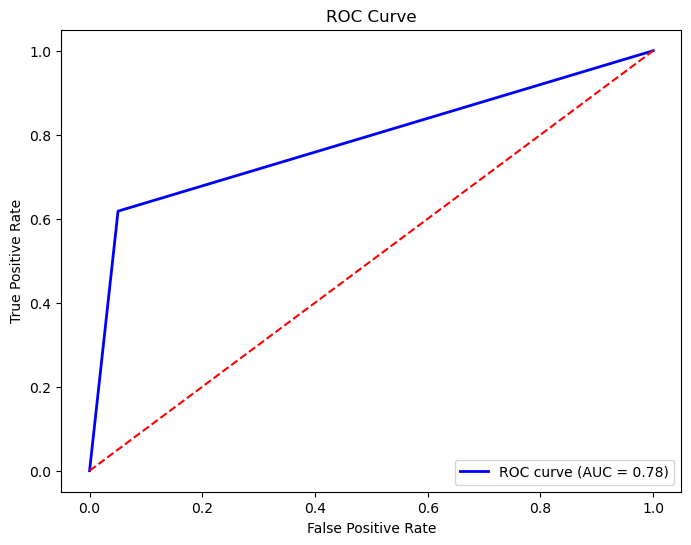

In [286]:
FPR, TPR, thresholds = roc_curve(Y_test, Y_Pred_Ensemble)

plt.figure(figsize=(8, 6))

plt.plot(FPR, TPR, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % Roc_Auc_Score)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()